In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the digits dataset
digits = load_digits()
X = digits.data  # Feature matrix
y = digits.target  # Labels


In [2]:
# Standardize the data (PCA works better on standardized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
# Apply PCA to reduce the dimensionality to 2 dimensions
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)


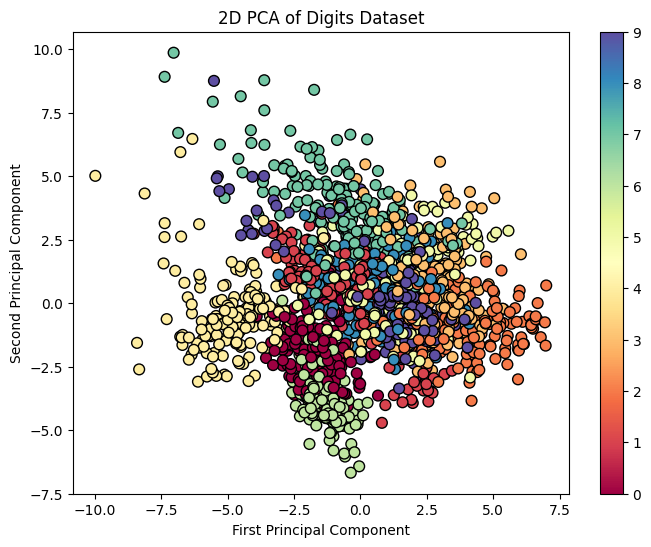

In [4]:
# Scatter plot of the 2D PCA-reduced data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='Spectral', edgecolor='k', s=60)
plt.colorbar(scatter)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D PCA of Digits Dataset')
plt.show()


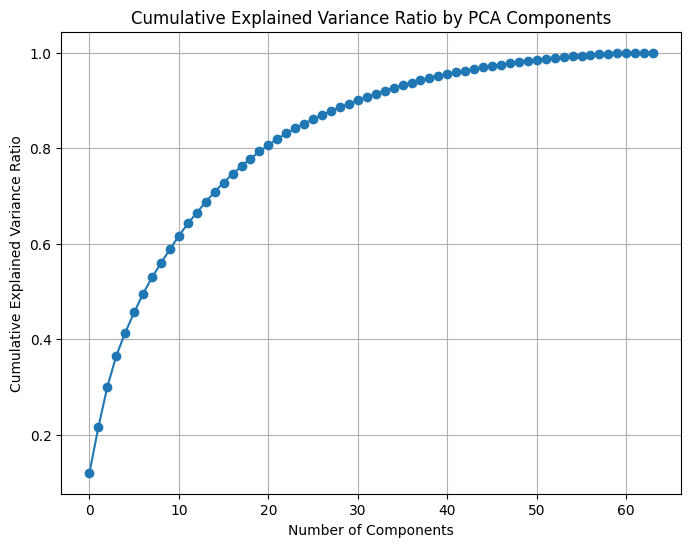

In [5]:
# Plot the cumulative explained variance as a function of the number of components
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by PCA Components')
plt.grid(True)
plt.show()


In [6]:
# Reconstruct the data using the largest subset of principal components
n_components = 30  # Select the top 30 components
pca_reconstruct = PCA(n_components=n_components)
X_pca_reduced = pca_reconstruct.fit_transform(X_scaled)
X_reconstructed = pca_reconstruct.inverse_transform(X_pca_reduced)


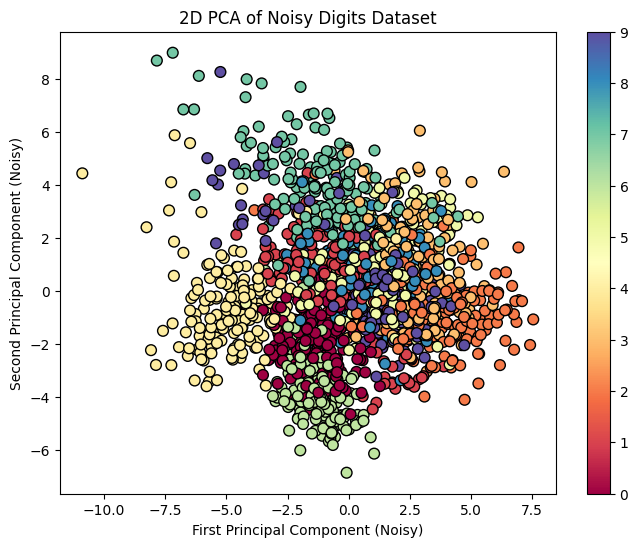

In [7]:
# Add noise to the dataset
noise_factor = 0.5
X_noisy = X_scaled + noise_factor * np.random.normal(size=X_scaled.shape)

# Apply PCA again to the noisy data
X_pca_noisy = pca_2d.fit_transform(X_noisy)

# Scatter plot of noisy PCA-reduced data
plt.figure(figsize=(8, 6))
scatter_noisy = plt.scatter(X_pca_noisy[:, 0], X_pca_noisy[:, 1], c=y, cmap='Spectral', edgecolor='k', s=60)
plt.colorbar(scatter_noisy)
plt.xlabel('First Principal Component (Noisy)')
plt.ylabel('Second Principal Component (Noisy)')
plt.title('2D PCA of Noisy Digits Dataset')
plt.show()
